In [1]:
import numpy as np
import pandas as pd
import os
import glob
import json
import scipy.io as scio
from scipy import stats
import pickle
import matplotlib.pyplot as plt
import warnings
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams["font.family"] = "Arial"

In [2]:
file = './results/extend_circuit_generalization_accuracy.pkl'
D = pickle.load(open(file, 'rb'))
all_vals = D['all_vals']
subj_num = D['subj_num']

In [3]:
def calculate_sd(mvals, num):
    sd_vals = np.zeros_like(mvals)
    perc = 0
    if mvals[0]>1:
        perc = 1
    for im,m in enumerate(mvals):
        if perc == 1:
            m = m/100
        a = np.zeros(num)
        a[:int(num*m)]= 1
        if perc == 1:
            sd_vals[im] = 100*np.std(a)/np.sqrt(num)
        else:
            sd_vals[im] = np.std(a)/np.sqrt(num)
    return sd_vals

In [4]:
from scipy.stats import bootstrap
from sklearn.utils import resample
def calculate_boot_sample(mvals, num, resamp_num=20):
    sd_vals = np.zeros_like(mvals)
    perc = 0
    if mvals[0]>1:
        perc = 1
    resample_values = np.zeros((resamp_num,len(mvals)))
    resample_ids = np.zeros((resamp_num,len(mvals)))
    for im,m in enumerate(mvals):
        if perc == 1:
            m = m/100
        a = np.zeros(num)
        a[:int(num*m)]= 1
        
        rs_vals = np.zeros(resamp_num)
        for irs in range(resamp_num):
            b = resample(a, replace=True, random_state=irs)
            rs_vals[irs] = b.mean()
        resample_values[:,im] = rs_vals
        resample_ids[:,im] = im
    if perc == 1:
        resample_values *= 100
    return resample_values, resample_ids

In [5]:
def get_chance_accuracy(test_num):
    half_num = int(0.5*test_num)
    for i in range(half_num,test_num):
        p = stats.binom_test(i, test_num)
        if p<0.05:
            acc = i/test_num
            break
    return acc

/tmp/ipykernel_346797/2590666461.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_test(i, test_num)
/tmp/ipykernel_346797/2590666461.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_test(i, test_num)
/tmp/ipykernel_346797/2590666461.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_test(i, test_num)
/tmp/ipykernel_346797/2590666461.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_test(i, test_num)
/tmp/ipykernel_346797/2590666461.py:4: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p = stats.binom_tes

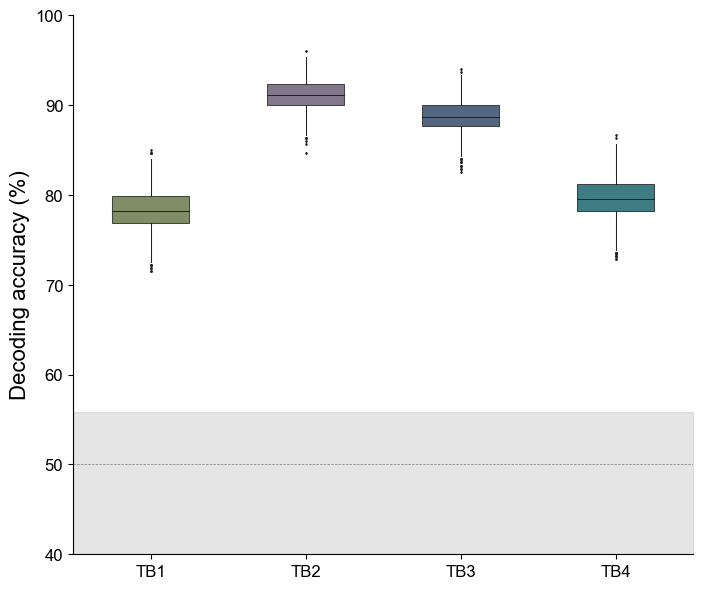

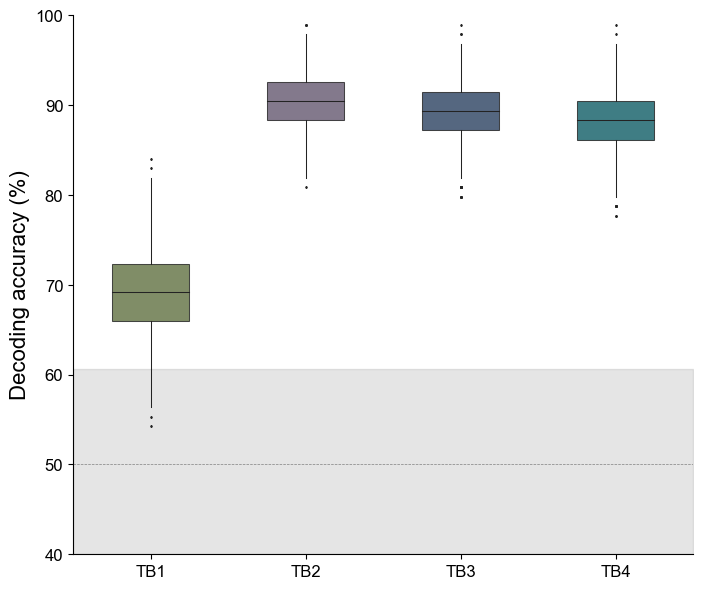

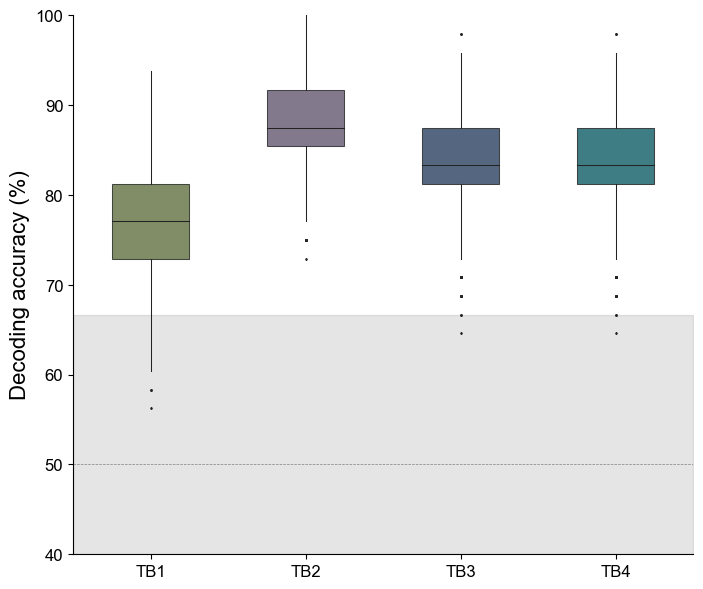

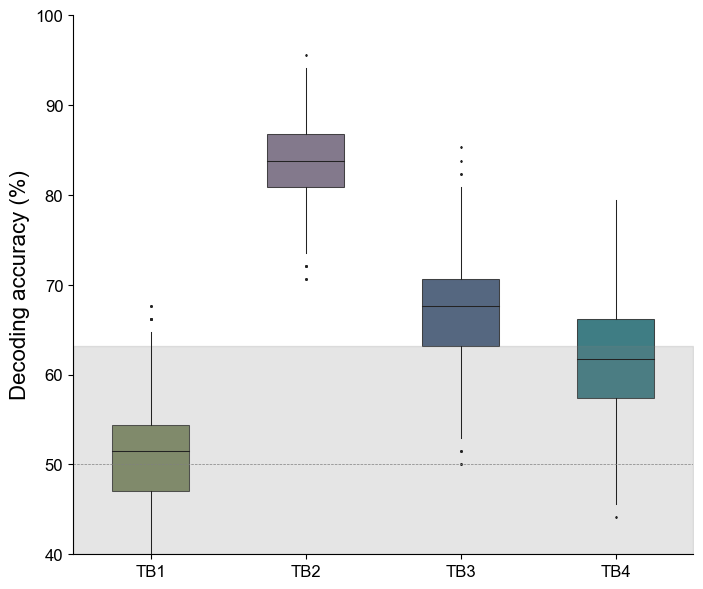

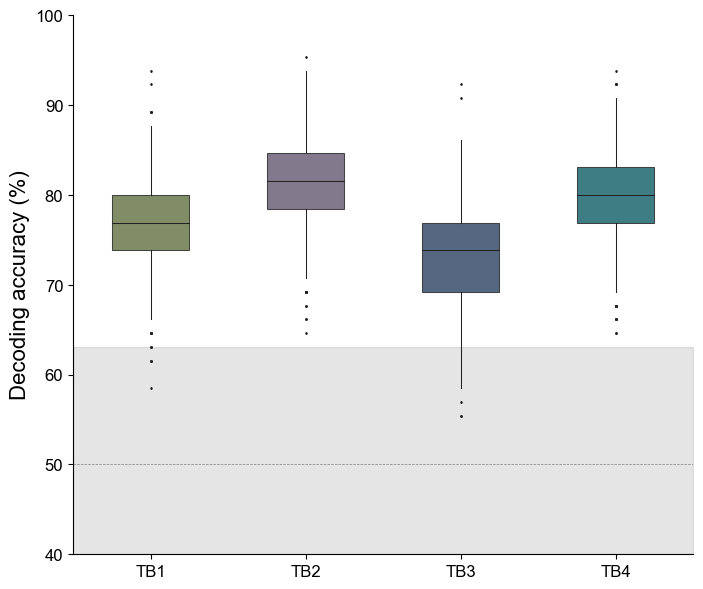

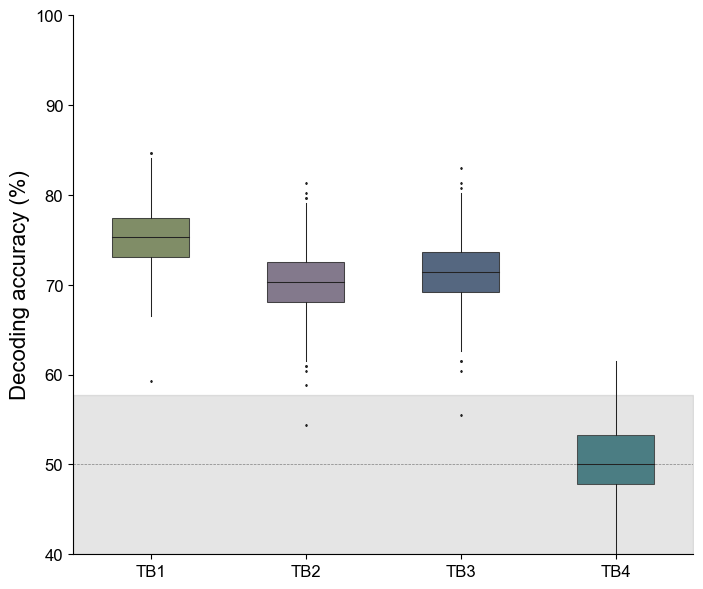

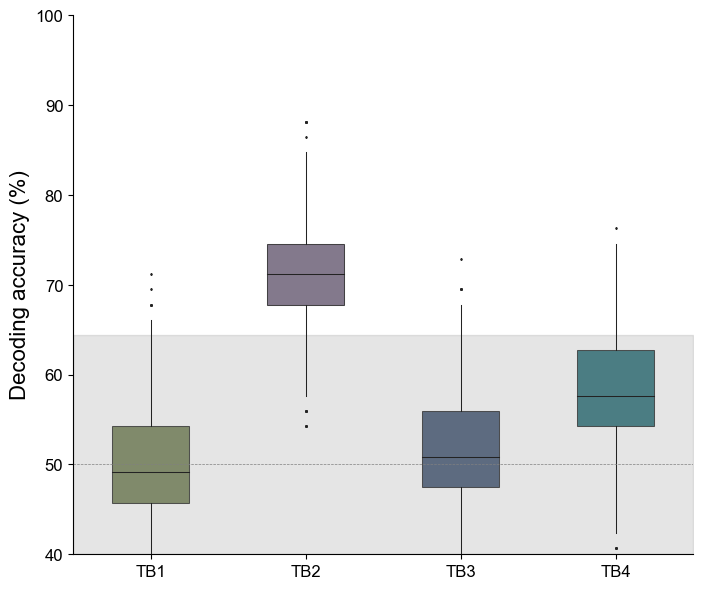

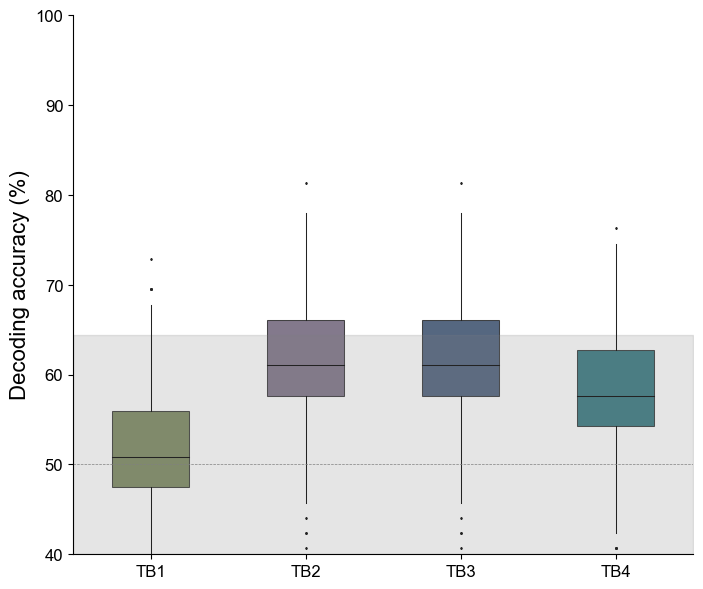

In [6]:
import seaborn as sns

# colors = [[100/255, 121/255, 57/255], [0/255, 172/255, 238/255], [12/255, 162/255, 74/255], [12/255, 136/255, 151/255]]
colors = [[100/255, 121/255, 57/255], [100/255, 84/255, 116/255], [33/255, 63/255, 105/255], [0/255, 105/255, 116/255]]
blk_num = 4
width = 0.6
xylab_size = 16
xytick_size = 12
xtick_labs = ['TB1', 'TB2', 'TB3', 'TB4']
my_pal = {0: colors[0], 1: colors[1], 2: colors[2], 3: colors[3]}

for idt in range(8):
    mvals = all_vals[idt]*100
    svals = calculate_sd(mvals, subj_num[idt])

    resample_values, resample_ids = calculate_boot_sample(mvals, subj_num[idt], 1000)
    df = pd.DataFrame({'Accuracy':resample_values.reshape(-1), 'Model':resample_ids.reshape(-1)})


    fig, ax = plt.subplots(1,1,figsize=(8, 7))
    ax = sns.boxplot(data=df, x='Model', y='Accuracy', orient="v", palette=my_pal, ax=ax, width=0.5, showcaps=False, boxprops=dict(alpha=.8), fliersize=1, linewidth=0.75)
    ax.plot([-0.5,blk_num-0.5], [50,50], linestyle='--', color='gray', linewidth=0.5)
    ax.set_ylim([40,100])
    ax.set_yticks(np.arange(40,101,10))
    ax.set_xticks(np.arange(blk_num))
    ax.set_xticklabels(xtick_labs, fontsize=xytick_size)
    ax.set_yticklabels(np.arange(40,101,10), fontsize=xytick_size)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_ylabel('Decoding accuracy (%)', fontsize=xylab_size)
    ax.set(xlabel=None);

    chace_acc = 100*get_chance_accuracy(subj_num[idt])
    ax.fill_between([-0.5,3.5], 40, chace_acc, alpha=0.2, color='gray');